<a href="https://colab.research.google.com/github/BarryLiu-97/Tensorflow-Tutorial/blob/master/basic/tf_exp_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 波士顿房价预测

## 波士顿房价一元线性回归

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


导入波士顿房价数据集

In [0]:
boston_housing = tf.keras.datasets.boston_housing
(train_x, train_y), (test_x, test_y) = boston_housing.load_data()

In [3]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((404, 13), (404,), (102, 13), (102,))

In [0]:
x_train = train_x[:,5] #取出所有训练样本中的房间数
y_train = train_y

In [5]:
x_train.shape, y_train.shape

((404,), (404,))

In [6]:
x_test = test_x[:,5]
y_test = test_y
x_test.shape, y_test.shape

((102,), (102,))

In [10]:
learn_rate = 0.04
epoch = 2000
display_step = 200

np.random.seed(1)
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

mse_train = []
mse_test = []
for i in range(epoch+1):
  with tf.GradientTape() as tape:

    pred_train = w*x_train+b
    loss_train = 0.5*tf.reduce_mean(tf.square(pred_train-y_train))

    pred_test = w*x_test+b
    loss_test = 0.5*tf.reduce_mean(tf.square(pred_test-y_test))
#将这四行放在with tf.GradientTape() as tape语句块中可以实现对变量的自动监视
  mse_train.append(loss_train)
  mse_test.append(loss_test)

  df_dw, df_db = tape.gradient(loss_train,[w,b])
  w.assign_sub(learn_rate*df_dw) 
  b.assign_sub(learn_rate*df_db) 

  if i % display_step == 0:
    print('i:%i, loss_train:%f, loss_test:%f' % (i,loss_train,loss_test))

i:0, loss_train:118.019997, loss_test:124.107971
i:200, loss_train:28.219284, loss_test:26.348902
i:400, loss_train:27.224102, loss_test:25.192783
i:600, loss_train:26.407099, loss_test:24.219810
i:800, loss_train:25.736385, loss_test:23.399433
i:1000, loss_train:25.185757, loss_test:22.706364
i:1200, loss_train:24.733721, loss_test:22.119640
i:1400, loss_train:24.362619, loss_test:21.621893
i:1600, loss_train:24.057959, loss_test:21.198702
i:1800, loss_train:23.807844, loss_test:20.838078
i:2000, loss_train:23.602520, loss_test:20.530069


可视化输出

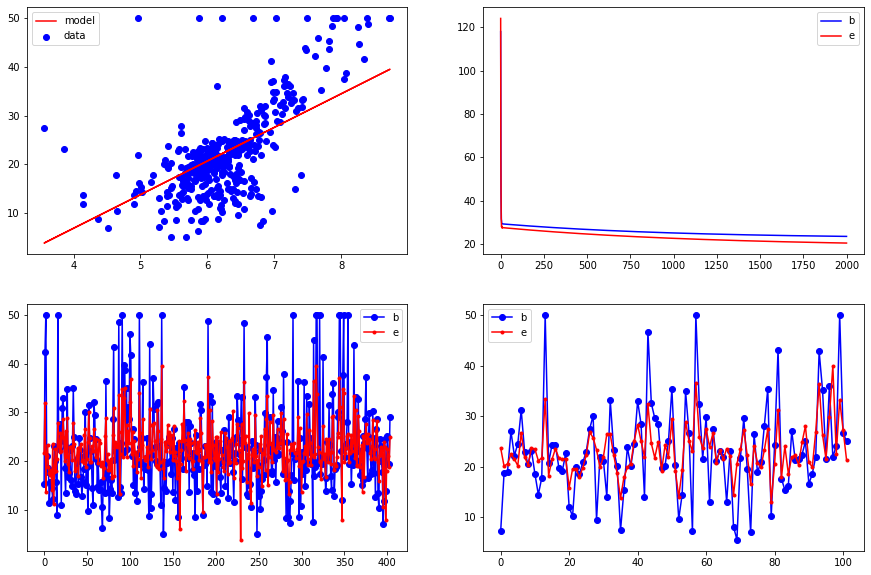

In [14]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.scatter(x_train, y_train,color='b',label='data')
plt.plot(x_train,pred_train,color='r',label='model')
plt.legend(loc='upper left')

plt.subplot(222)
plt.plot(mse_train, color='b', label='train_loss')
plt.plot(mse_test, color='r', label='test_loss')
plt.legend('best')

plt.subplot(223)
plt.plot(y_train, color='b',marker='o', label='true_price')
plt.plot(pred_train, color='r',marker='.', label='predict')
plt.legend('best')

plt.subplot(224)
plt.plot(y_test, color='b',marker='o', label='train_loss')
plt.plot(pred_test, color='r',marker='.', label='test_loss')
plt.legend('best')

plt.show()

## 波士顿房价多元线性回归

### 多元数组归一化

In [15]:
#method 1
x = np.array([[3., 10, 500],
        [2., 20, 200],
        [1., 30, 300],
        [5., 50, 100]])

x.dtype,x.shape

(dtype('float64'), (4, 3))

In [17]:
for i in range(x.shape[1]):
  x[:,i] = (x[:,i] - x[:,i].min())/(x[:,i].max()-x[:,i].min())
x

array([[0.5 , 0.  , 1.  ],
       [0.25, 0.25, 0.25],
       [0.  , 0.5 , 0.5 ],
       [1.  , 1.  , 0.  ]])

In [18]:
# method 2 使用广播运算
x = np.array([[3., 10, 500],
        [2., 20, 200],
        [1., 30, 300],
        [5., 50, 100]])
x = (x - x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))
x

array([[0.5 , 0.  , 1.  ],
       [0.25, 0.25, 0.25],
       [0.  , 0.5 , 0.5 ],
       [1.  , 1.  , 0.  ]])

In [28]:
boston_housing = tf.keras.datasets.boston_housing
(train_x, train_y), (test_x, test_y) = boston_housing.load_data()

# 使用波士顿房价数据中所有13个属性进行多元线性回归
num_train = len(train_x)
num_test = len(test_x)

x_train = (train_x-train_x.min(axis=0))/(train_x.max(axis=0)-train_x.min(axis=0))
y_train = train_y

x_test = (test_x-test_x.min(axis=0))/(test_x.max(axis=0)-test_x.min(axis=0))
y_test = test_y

x0_train = np.ones(num_train).reshape(-1,1) #n行一列数据,n自动计算
x0_test = np.ones(num_test).reshape(-1,1)

X_train = tf.cast(tf.concat([x0_train,x_train],axis=1),tf.float32)
X_test = tf.cast(tf.concat([x0_test,x_test],axis=1),tf.float32)

X_train.dtype, X_test.shape

(tf.float32, TensorShape([102, 14]))

In [0]:
Y_train = tf.constant(y_train.reshape(-1,1),tf.float32)
Y_test = tf.constant(y_test.reshape(-1,1),tf.float32)

In [0]:
learning_rate = 0.01
epoch = 2000
display_step = 200

In [31]:
np.random.seed(1)
W = tf.Variable(np.random.randn(14,1),dtype=tf.float32)
mse_train = []
mse_test = []


for i in range(epoch+1):
  with tf.GradientTape() as tape:

    PRED_train = tf.matmul(X_train,W)
    Loss_train = 0.5*tf.reduce_mean(tf.square(PRED_train-Y_train))

    PRED_test = tf.matmul(X_test,W)
    Loss_test = 0.5*tf.reduce_mean(tf.square(PRED_test-Y_test))
#将这四行放在with tf.GradientTape() as tape语句块中可以实现对变量的自动监视
  mse_train.append(Loss_train)
  mse_test.append(Loss_test)

  df_dW = tape.gradient(Loss_train,W)
  W.assign_sub(learn_rate*df_dW) 
  
  if i % display_step == 0:
    print('i:%i, Train Loss:%f, Test Loss:%f' % (i,Loss_train, Loss_test))

i:0, Train Loss:294.472961, Test Loss:313.655518
i:200, Train Loss:21.490562, Test Loss:21.699301
i:400, Train Loss:17.615210, Test Loss:19.162441
i:600, Train Loss:15.508549, Test Loss:18.708769
i:800, Train Loss:14.266354, Test Loss:18.964493
i:1000, Train Loss:13.491336, Test Loss:19.452862
i:1200, Train Loss:12.983068, Test Loss:19.975565
i:1400, Train Loss:12.634377, Test Loss:20.452948
i:1600, Train Loss:12.384963, Test Loss:20.857697
i:1800, Train Loss:12.199455, Test Loss:21.185610
i:2000, Train Loss:12.056376, Test Loss:21.442188


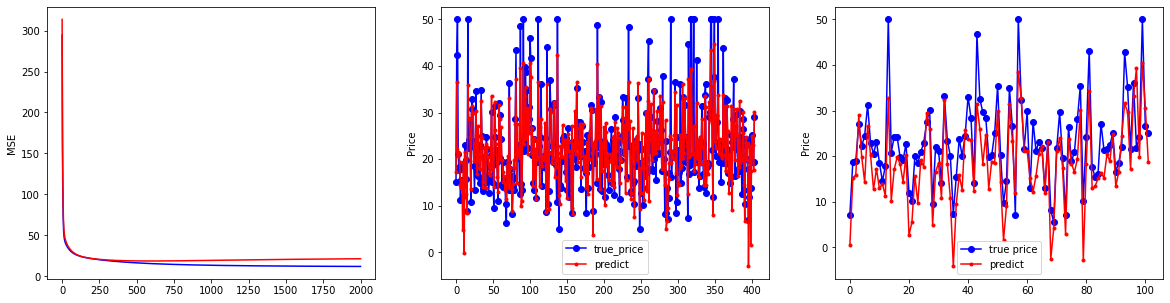

In [40]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.ylabel('MSE')
plt.plot(mse_train,color='b')
plt.plot(mse_test,color='r')

plt.subplot(132)
plt.plot(y_train,color='b',marker='o',label='true_price')
plt.plot(PRED_train,color='r',marker='.',label='predict')
plt.legend()
plt.ylabel('Price')

plt.subplot(133)
plt.plot(y_test,color='b',marker='o',label='true price')
plt.plot(PRED_test,color='r',marker='.',label='predict')
plt.legend()
plt.ylabel('Price')

plt.show()